# ---------------------------------- Imports ----------------------------------

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

from knac_helpers import prepareDf2, myPlot1, myPlot2, make_blobs_weights, generate_weights, display_side_by_side, split, merge

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import umap

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans

In [4]:
import pandas as pd
import numpy as np

In [5]:
from knac import KNAC

#  ---------------------------------- Helpers ----------------------------------

In [6]:
random_state = 170

In [7]:
def prepare_splits_df(splits):
    if (splits.empty):
        return pd.DataFrame(columns = ['clusters', 'confidence'])
    
    splits = splits.to_frame()
    splits = splits['split'].apply(lambda x: pd.Series(x))
    splits.rename(columns={0:'clusters', 1:'confidence'}, inplace=True)
    return splits

def print_test_results(s_10, s, s_silhouette, m, m_metrics, dataset_name):
    print_for_single = display
    print_for_many = display_side_by_side

    print('''
####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --''')
    
    s_10_df = prepare_splits_df(s_10)
    s_df = prepare_splits_df(s)
    s_silhouette_df = prepare_splits_df(s_silhouette)
    
    print_for_many(s_10_df, s_df, s_silhouette_df)
    
    print('''
####################################
############## MERGES ##############
####################################
''')
        
    print('standard merges')
    print_for_single(m)
    
    print('\nmerges (with linkage criterion)\n------ single link ------ avg. link ------ complete link ------ centroids ------ ward\'s\n')
    print_for_many(*m_metrics)

In [8]:
def test_splitmerge_without_plot(df, X, Y, E, dataset_name):
    knac = KNAC()
    knac.fit(df)
    
    # ------------------ splits ------------------
    
    s_10 = knac.splits(threshold_override=0.2)
    s = knac.splits(threshold_override=0.6)
    s_silhouette = knac.splits(threshold_override=0.6, 
                               silhouette_metric={
                                   'weight': 0.5, 
                                   'data': X, 
                                   'labels_automatic': Y, 
                                   'labels_expert': E
                               })
    
    
    # ------------------ merges ------------------
    m = knac.merges()
    metrics = ['single_link', 'average_link', 'complete_link', 'centroids_link', 'wards_link']
    m_metrics = []
    
    for metric in metrics:
        m_ = knac.merges(clusters_linkage_metric={
            'weight': 0.2,
            'metric': metric, 
            'data': X, 
            'labels_expert': E            
        })
        m_metrics.append(m_)
    
    
    # ------------------ printing all ------------------
    print_test_results(s_10, s, s_silhouette, m, m_metrics, dataset_name)
    
    return (s_10, s, s_silhouette)

def test_splitmerge(X, Y, E, dataset_name, centersY=None, centersE=None, patches=None):
    df = prepareDf2(E, Y)
    knac = KNAC()
    knac.fit(df)
    
    h_sm = knac.H_conf2
    
    myPlot1(X, Y, E, dataset_name=dataset_name, centersY=centersY, centersE=centersE, patches=patches, heatmap_matrix=h_sm, heatmap_matrix_type='split')
    
    test_splitmerge_without_plot(df, X, Y, E, dataset_name)

# ------------------------------

In [9]:
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
plt.rc('grid', color='w', linestyle='solid')

# ---------------------------------- Examples ----------------------------------

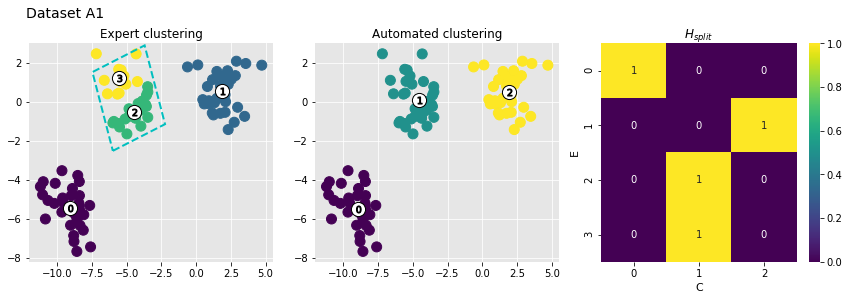


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
,clusters,confidence
,clusters,confidence



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
3,2,3,1.0



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
3,2,3,0.983777
,C1,C2,similarity
3,2,3,0.980793
,C1,C2,similarity
3,2,3,0.979155
,C1,C2,similarity
3,2,3,0.966338
,C1,C2,similarity
3,2,3,0.989502


In [10]:
X1, Y1, centers1 = make_blobs(n_features=2, centers=3, random_state=random_state, return_centers=True)

clusterer4 = KMeans(n_clusters=4, random_state=random_state)
E4 = clusterer4.fit_predict(X1)

rect0 = patches.Rectangle((-6,-2.5),4,4.3,angle=20,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
_ = test_splitmerge(X1, Y1, E4, 'A1', centers1, clusterer4.cluster_centers_, patches={'E': [rect0]})


# ------------------------------


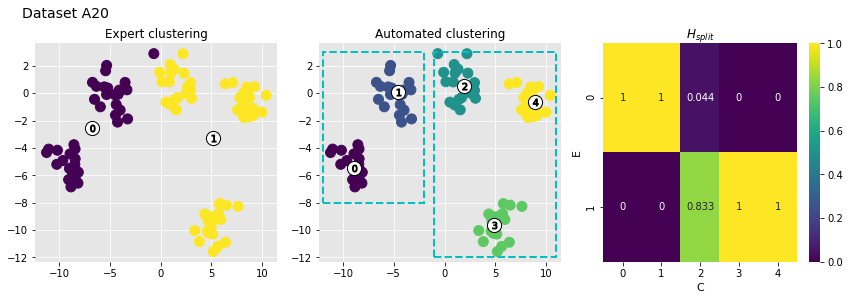


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
0,"(0, 1)",1.000000
1,"(2, 3, 4)",0.944404
,clusters,confidence
0,"(0, 1)",1.000000
1,"(2, 3, 4)",0.944404
,clusters,confidence
0,"(0, 1)",0.742815
1,"(2, 3, 4)",0.735472



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity


In [11]:
X20, Y20, centers20 = make_blobs(n_features=2, centers=5, random_state=random_state, return_centers=True)

clusterer20 = KMeans(n_clusters=2, random_state=random_state)
E20 = clusterer20.fit_predict(X20)

rect0 = patches.Rectangle((-12,-8),10,11,angle=0,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
rect1 = patches.Rectangle((-1,-12),12,15,angle=0,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
_ = test_splitmerge(X20, Y20, E20, 'A20', centers20, clusterer20.cluster_centers_, patches={'C': [rect0, rect1]})


# ------------------------------


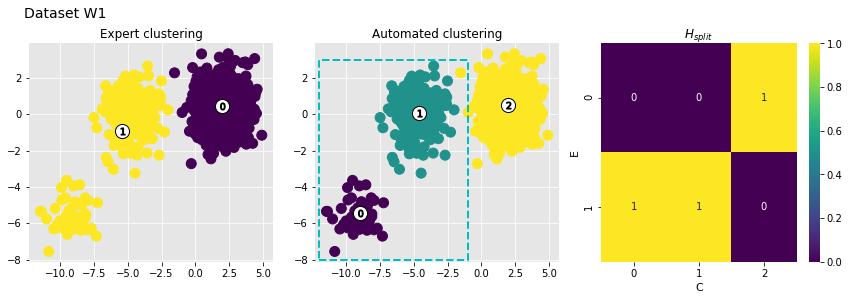


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
1,"(0, 1)",1.0
,clusters,confidence
1,"(0, 1)",1.0
,clusters,confidence
1,"(0, 1)",0.75



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity


In [12]:
np.random.seed(random_state + 1)
X1_w, Y1_w, centers1_w = make_blobs_weights(weights=[0.05, 0.25, 0.7], n_samples=1000, n_features=2, centers=3, random_state=random_state, return_centers=True)
clusterer1_w = KMeans(n_clusters=2, random_state=random_state)
E1_w = clusterer1_w.fit_predict(X1_w)

rect0 = patches.Rectangle((-12,-8),11,11,angle=0,ec='c', fc="None", ls='--', linewidth=2, clip_on=False)
_ = test_splitmerge(X1_w, Y1_w, E1_w, 'W1', centers1_w, clusterer1_w.cluster_centers_, patches={'C': [rect0]})

# ------------------------------

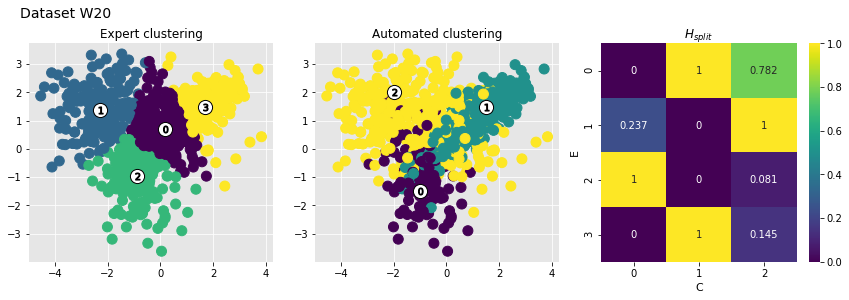


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
0,"(1, 2)",0.891031
1,"(0, 2)",0.618356
,clusters,confidence
0,"(1, 2)",0.891031
,clusters,confidence
0,"(1, 2)",0.682809



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
1,0,3,0.883356



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
1,0,3,0.896339
,C1,C2,similarity
1,0,3,0.862547
,C1,C2,similarity
1,0,3,0.880408
,C1,C2,similarity
1,0,3,0.820667
,C1,C2,similarity
1,0,3,0.845765


In [13]:
np.random.seed(random_state + 10)
weights = generate_weights(size=3)

X20_w, Y20_w = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_classes=3,
                             n_clusters_per_class=1, random_state=random_state + 10, weights=weights)

clusterer20_w = KMeans(n_clusters=4, random_state=random_state)
E20_w = clusterer20_w.fit_predict(X20_w)
centers20_w_Y = np.array([[-1, -1.5], [1.5, 1.5], [-2, 2]])
_ = test_splitmerge(X20_w, Y20_w, E20_w, 'W20', centers20_w_Y, clusterer20_w.cluster_centers_)

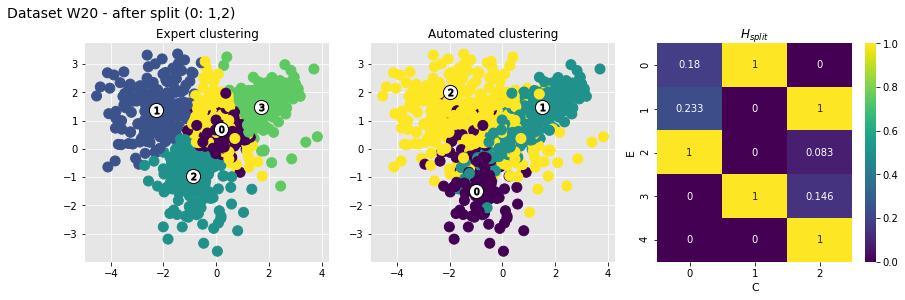


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
1,"(0, 2)",0.61628
,clusters,confidence
,clusters,confidence



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
1,0,3,0.990889
3,1,4,0.996029



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
1,0,3,0.979312
3,1,4,0.982403
,C1,C2,similarity
1,0,3,0.943852
3,1,4,0.910099
,C1,C2,similarity
1,0,3,0.936259
3,1,4,0.901707
,C1,C2,similarity
1,0,3,0.910138


In [14]:
E20_w_s1 = split(E20_w, Y20_w, row=0, col1=1, col2=2)
_ = test_splitmerge(X20_w, Y20_w, E20_w_s1, 'W20 - after split (0: 1,2)', centers20_w_Y, clusterer20_w.cluster_centers_)

# ------------------------------

In [15]:
X101, Y101 = make_classification(n_samples=1000, n_features=20, n_redundant=5, n_informative=15, n_classes=10,
                             n_clusters_per_class=1, random_state=random_state + 10)

np.random.seed(random_state + 101)
weights = generate_weights(size=10)
X101_w, Y101_w = make_classification(n_samples=1000, n_features=20, n_redundant=5, n_informative=15, n_classes=10,
                             n_clusters_per_class=1, random_state=random_state + 10, weights=weights)

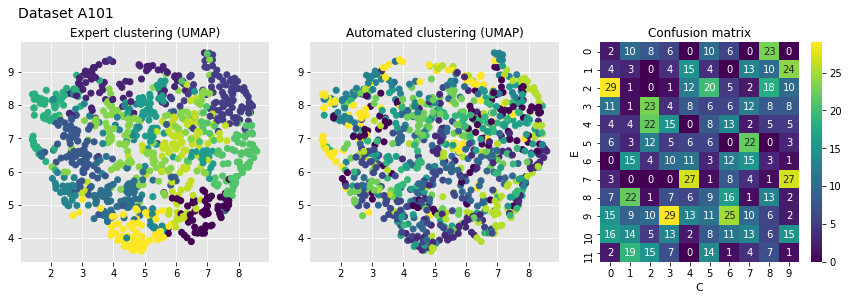


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
0,"(1, 2, 3, 5, 6, 8)",0.452270
1,"(4, 7, 8, 9)",0.677701
2,"(0, 4, 5, 8, 9)",0.640723
3,"(0, 2, 4, 5, 6, 7, 8, 9)",0.428971
4,"(2, 3, 5, 6, 8, 9)",0.523075
5,"(0, 2, 3, 4, 5, 7)",0.420669
6,"(1, 2, 3, 4, 5, 6, 7)",0.642166
7,"(4, 6, 9)",0.749511
8,"(0, 1, 3, 4, 5, 6, 8)",0.503350
9,"(0, 1, 2, 3, 4, 5, 6, 7)",0.506078



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
2,1,7,0.856002
5,3,4,0.802863
6,3,5,0.805368
16,9,10,0.807516



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
,C1,C2,similarity
2,1,7,0.845611
5,3,4,0.811997
6,3,5,0.807211
9,4,9,0.809575
13,6,9,0.809783
20,9,10,0.820118
,C1,C2,similarity
2,1,7,0.813392
12,9,10,0.804838


In [16]:
E101 = KMeans(n_clusters=12, random_state=random_state).fit_predict(X101)
df101 = myPlot2(X101, Y101, E101, dataset_name='A101')
_ = test_splitmerge_without_plot(df101, X101, Y101, E101, 'A101')

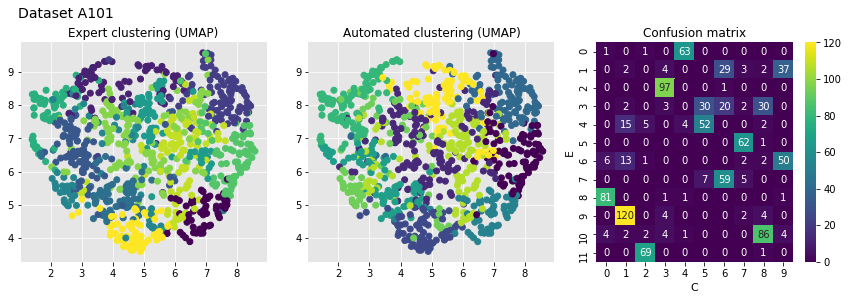


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
1,"(6, 9)",0.843521
3,"(5, 6, 8)",0.737768
,clusters,confidence
1,"(6, 9)",0.843521
3,"(5, 8)",0.823526
,clusters,confidence
1,"(6, 9)",0.670627
3,"(5, 6, 8)",0.616154



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity
,C1,C2,similarity


In [17]:
A101 = KMeans(n_clusters=10, random_state=random_state).fit_predict(X101)
df101_A = myPlot2(X101, A101, E101, dataset_name='A101')
_ = test_splitmerge_without_plot(df101_A, X101, A101, E101, 'A101')

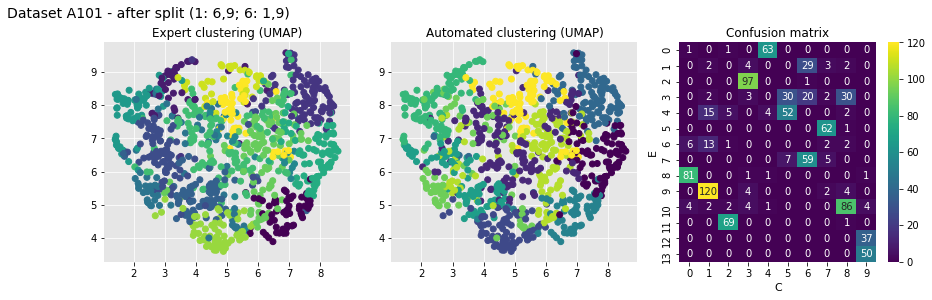


####################################
############## SPLITS ##############
####################################

---- normal thld=0.2 ------ normal thld=0.6 ------ with silhouette 0.5 --


,clusters,confidence
3,"(5, 6, 8)",0.738312
6,"(0, 1, 7)",0.681811
,clusters,confidence
3,"(5, 8)",0.823882
6,"(0, 1)",0.871354
,clusters,confidence
3,"(5, 6, 8)",0.617025
6,"(0, 1, 7)",0.587438



####################################
############## MERGES ##############
####################################

standard merges


,C1,C2,similarity
2,1,7,0.979186
8,6,9,0.894380
17,12,13,1.000000



merges (with linkage criterion)
------ single link ------ avg. link ------ complete link ------ centroids ------ ward's



,C1,C2,similarity
2,1,7,0.898324
8,6,9,0.830683
17,12,13,0.913695
,C1,C2,similarity
2,1,7,0.957683
8,6,9,0.895053
17,12,13,0.979537
,C1,C2,similarity
2,1,7,0.947829
8,6,9,0.892525


In [18]:
E101_s1 = split(E101, A101, row=1, col1=6, col2=9)
E101_s1s2 = split(E101_s1, A101, row=6, col1=1, col2=9)
df101_A = myPlot2(X101, A101, E101_s1s2, dataset_name='A101 - after split (1: 6,9; 6: 1,9)')
_ = test_splitmerge_without_plot(df101_A, X101, A101, E101_s1s2, 'A101 - after split')